In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import euclidean_distances
import sys
sys.path.append("../")
# from scripts.satisfaction_analysis import 

user_data_with_scores= pd.read_csv("../results/user_data_with_scores.csv")


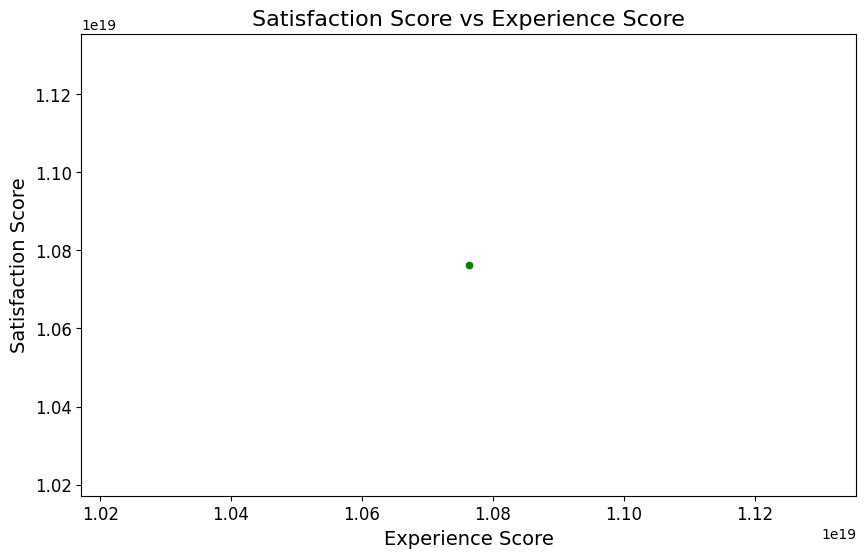

In [25]:
 # Scatter plot of Satisfaction Score vs Experience Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_data_with_scores, x='Experience Score', y='Satisfaction Score', color='green')
plt.title('Satisfaction Score vs Experience Score', fontsize=16)
plt.xlabel('Experience Score', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


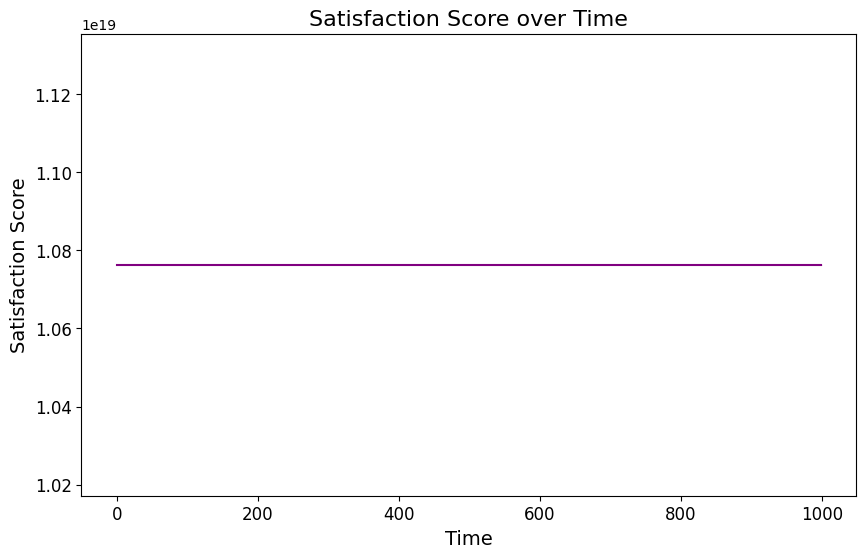

In [18]:
time_column = 'Start ms'  # Replace 'Time' with your actual time column name
plt.figure(figsize=(10, 6))
sns.lineplot(data=user_data_with_scores, x=time_column, y='Satisfaction Score', color='purple')
plt.title('Satisfaction Score over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16044\4208212745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_data_with_scores, x='Handset Type', y='Satisfaction Score', palette='Set2', linewidth=2.5, width=0.7)


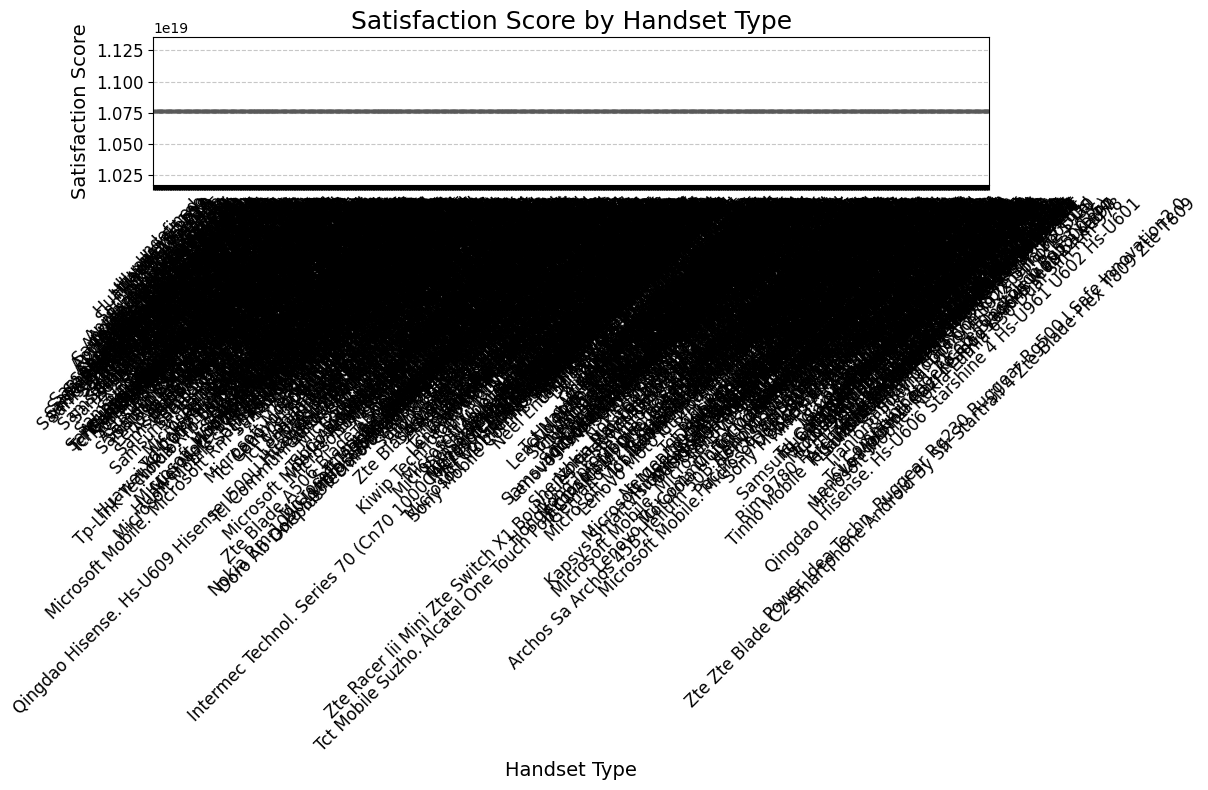

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=user_data_with_scores, x='Handset Type', y='Satisfaction Score', palette='Set2', linewidth=2.5, width=0.7)
plt.title('Satisfaction Score by Handset Type', fontsize=18)
plt.xlabel('Handset Type', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df_experience= pd.read_csv("../results/user_data_with_scores.csv")

df_experience['Satisfaction Score'] = (df_experience['Engagement Score'] + df_experience['Experience Score']) / 2
df_experience.to_csv("../results/user_data_with_scores.csv", index=False)

# Split the data into features (engagement score and experience score) and target (satisfaction score)
X = df_experience[['Engagement Score', 'Experience Score']]
y = df_experience['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean Squared Error:', mse)

Mean Squared Error: 150341341413376.0
